# Adaptive Gradient Descend Application
Adaline introduced the linear activation function for weight update in the perceptron algorithm and concept of minimizing continuous cost function. Which also seperate the wieght update part with activation and prediction part with a threshold function. It also intruduce Gradiant Descend based approach to minimize the cost function.

[Click here to see the implementaiton](https://github.com/DataPsycho/StatBase/blob/master/01-Tour-Of-Algorithms/neuralbase/adaline.py)

### Regular Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Plot setting
plt.style.use('bmh')
plt.rcParams["font.size"] = "14"

### Data Load & Exploration

In [3]:
df = (
    pd.read_csv(
        'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
        header=None)
)

In [4]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


### Preprocession

In [5]:
# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length, a 2 dimentional array
X = df.iloc[0:100, [0, 2]].values

In [6]:
print("Feature Matrix : \n", X[:3])
print("Target Column Vector : \n", y[:3])

Feature Matrix : 
 [[5.1 1.4]
 [4.9 1.4]
 [4.7 1.3]]
Target Column Vector : 
 [-1 -1 -1]


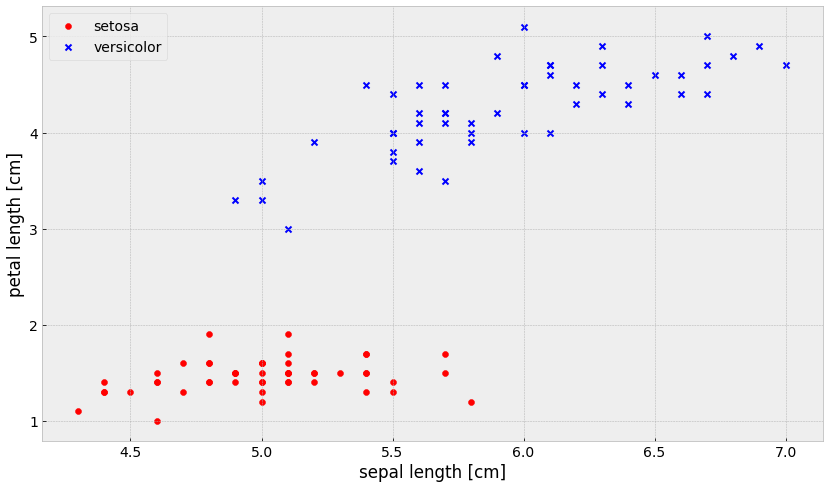

In [7]:
plt.figure(figsize=(14,8))
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label = 'setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label = 'versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

### Training A Model

In [8]:
from neuralbase import AdalineGD

In [9]:
ada1 = AdalineGD(eta=0.1, n_iter=10)
ada1.fit(X, y)

### Evaluating The Model

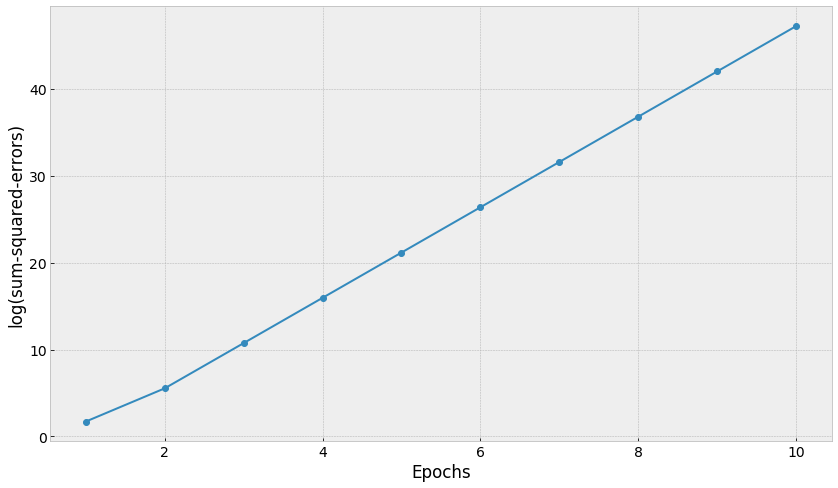

In [10]:
plt.figure(figsize=(14, 8))
plt.plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
plt.xlabel('Epochs')
plt.ylabel('log(sum-squared-errors)')
plt.show()

*Note: The following figure shows, the cost is actually increasing, Which could be a side effect of larger learning rate. Which brings us the point of thinking about the hyper parameters of the model the $\eta$ and no. of iteration (n_iter)*

Text(0.5, 1.0, 'Adaline - Learning rate 0.0001')

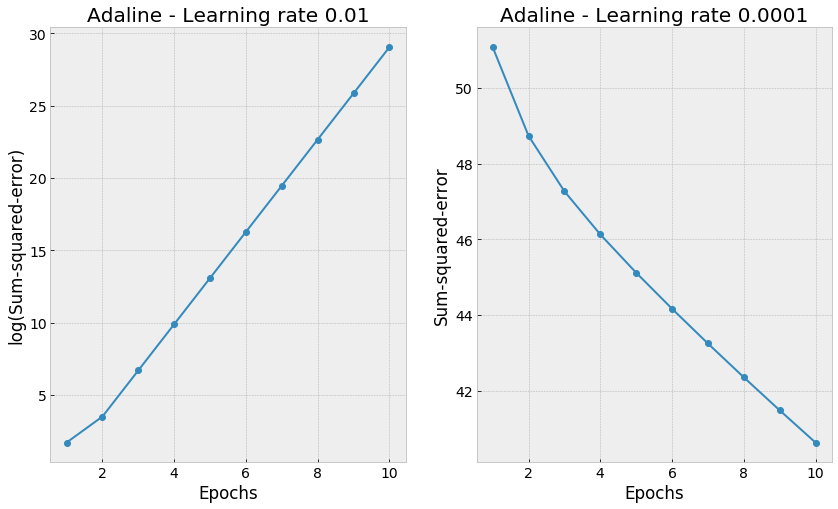

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 8))
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

### Improving GD with Feature Scalling

In [9]:
from neuralbase.test import AdalineGDTest

In [36]:
# Apply Normalizaiton
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

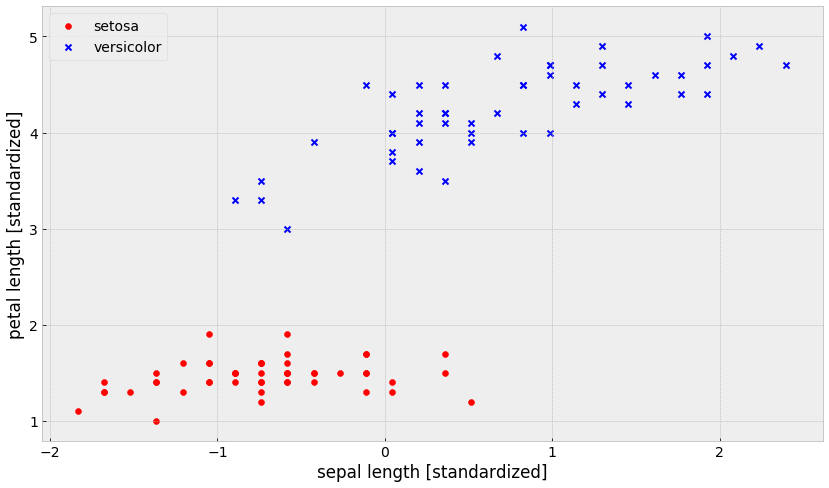

In [37]:
plt.figure(figsize=(14,8))
plt.scatter(X_std[:50, 0], X[:50, 1], color='red', marker='o', label = 'setosa')
plt.scatter(X_std[50:100, 0], X[50:100, 1], color='blue', marker='x', label = 'versicolor')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()

In [41]:
ada = AdalineGDTest(n_iter=15, eta=0.01)
ada.fit(X_std, y)

### Checking The Disission Boundry

In [38]:
from neuralbase import plot_decision_regions

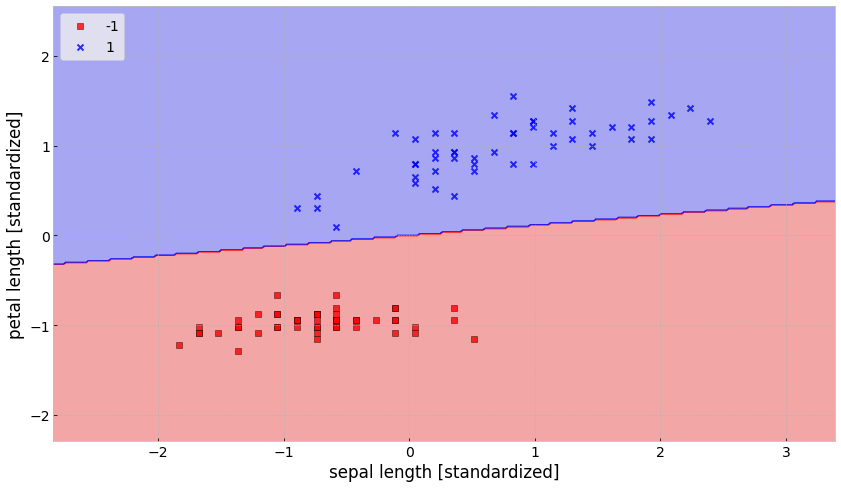

In [43]:
plt.figure(figsize=(14, 8))
plot_decision_regions(X_std, y, classifier=ada)
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()

*Note: Result Shows the Perceptron Algorithm was able to seperate the region successfully*

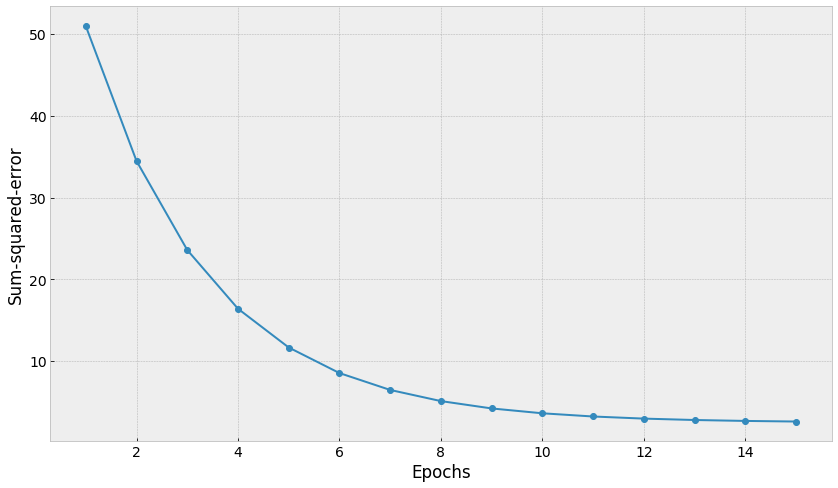

In [45]:
plt.figure(figsize=(14, 8))
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()

### Referances

[1] [Python Machine Learning](https://sebastianraschka.com/books.html)